### TAKE HOME EXERCISE


1. Dataset used are melb_data.csv. for X = Distance and Y = Price.  


2. Make some test to find the best SLR models.


3. Test 1 (train 80% test 20%) conditions :

    1.a) Distance = no intervention.
    
    1.b) Distance = handle missing value.
    
    1.c) Distance = handle missing value + handle outlier.
    
    1.d) Distance = handle missing value + handle outlier + scaling.
    
    
4. Test 2 (train 90% test 10%) conditions :

    2.a) Distance = no intervention.
    
    2.b) Distance = handle missing value.
    
    2.c) Distance = handle missing value + handle outlier.
    
    2.d) Distance = handle missing value + handle outlier + scaling.  
    
    
5. Try to calculate The MAE, MSE, and RMSE for every test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

First let's load the datasets, and display it.

In [3]:
df_melb = pd.read_csv('melb_data.csv')

In [4]:
df_melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df_melb['Distance'].isna().sum()

0

As shown above, since there are no missing values in this data, we'll skip the 'b' part. Below, we start to determine the dependent and independent variables. Then we can start the process sequentially.

In [6]:
x = df_melb['Distance'].values.reshape(-1,1)
y = df_melb['Price'].values.reshape(-1,1)

## Test 1 (Train 80%)

### a) No Intervention

#### Split dependent (y) & independent (x) variables

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

#### Split data to Train & Test

In [8]:
regressor = LinearRegression()
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find Slope & Intercept

In [9]:
intercept = regressor.intercept_
slope = regressor.coef_
print(intercept, slope)

[1253020.23097842] [[-17477.41099535]]


#### Y Predict

In [10]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,2165000.0,1.113201e+06
1,815000.0,1.137669e+06
2,610000.0,1.069507e+06
3,1245000.0,1.174372e+06
4,1160000.0,1.104462e+06
...,...,...
2711,305000.0,1.141165e+06
2712,1412000.0,1.113201e+06
2713,1230000.0,1.064264e+06
2714,1270000.0,1.144660e+06


#### Visualization of Y Actual with Y Predict

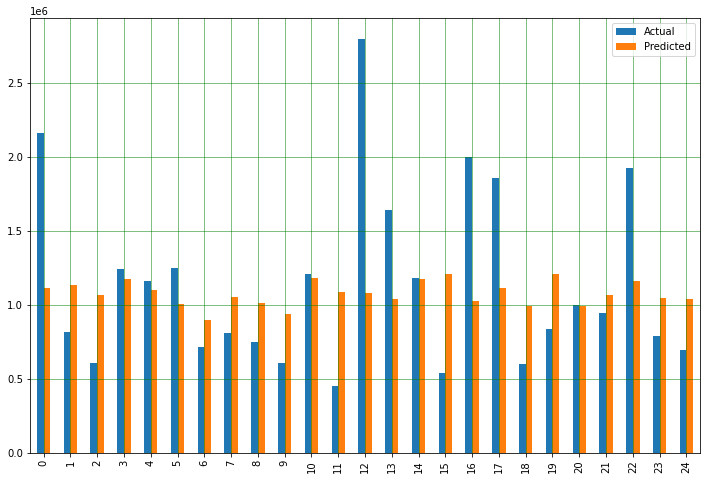

In [11]:
df.head(25).plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluation Metrics

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Max Error:",round(metrics.max_error(y_test, y_pred), 2))

Mean Absolute Error: 453479.31553528755
Mean Squared Error: 383466291875.1081
Root Mean Squared Error: 619246.5517668291
Max Error: 5199412.0


In [13]:
print('MedAE :', 
     round(metrics.median_absolute_error(y_test, y_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y_test, y_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y_test, y_pred)))
print('R2 Score :',
     round(metrics.r2_score(y_test, y_pred), 2))

MedAE : 366714.5
MSLE : 0.29
RMSLE : 0.0
R2 Score : 0.03


### c) Handle outlier

In [14]:
df1_melb = df_melb.copy()

In [15]:
Q1 = df1_melb['Distance'].quantile(0.25)
Q3 = df1_melb['Distance'].quantile(0.75)
IQR = Q3 - Q1

In [16]:
df1_melb_outdrop = df1_melb[~((df1_melb['Distance'] < (Q1 - 1.5 * IQR)) |(df1_melb['Distance'] > (Q3 + 1.5 * IQR)))]

In [17]:
df1_melb_outdrop.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [18]:
x1 = df1_melb_outdrop['Distance'].values.reshape(-1,1)
y1 = df1_melb_outdrop['Price'].values.reshape(-1,1)

#### Split dependent (y) & independent (x) variables

In [19]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, random_state=0)

#### Split data to Train & Test

In [20]:
regressor = LinearRegression()
regressor.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find Slope & Intercept

In [21]:
intercept = regressor.intercept_
slope = regressor.coef_
print(intercept, slope)

[1251248.40606708] [[-17164.76961539]]


#### Y Predict

In [22]:
y1_pred = regressor.predict(x1_test)
df1 = pd.DataFrame({'Actual' : y1_test.flatten(), 'Predicted' : y1_pred.flatten()})
df1

,Actual,Predicted
0,1342000.0,1.186022e+06
1,650000.0,1.095049e+06
2,2300000.0,1.100198e+06
3,702000.0,1.034972e+06
4,880000.0,1.107064e+06
...,...,...
2629,350000.0,1.223785e+06
2630,495000.0,1.146543e+06
2631,400000.0,1.059003e+06
2632,460000.0,1.059003e+06


#### Visualization of Y Actual with Y Predict

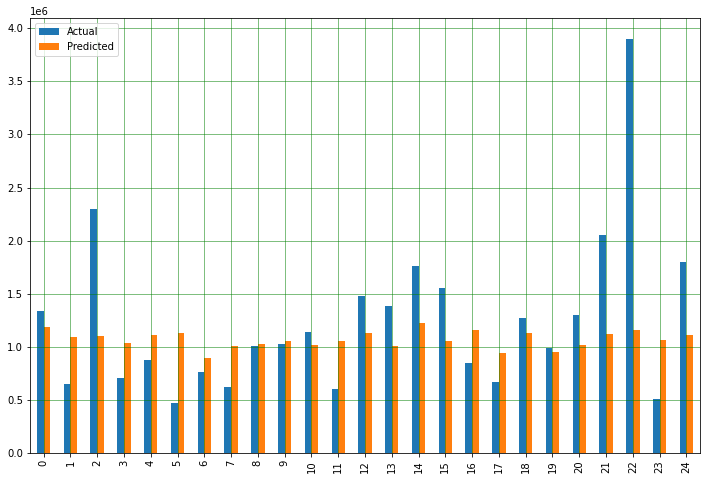

In [23]:
df1.head(25).plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluation Metrics

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("Max Error:",round(metrics.max_error(y1_test, y1_pred), 2))

Mean Absolute Error: 458288.65405522526
Mean Squared Error: 375910769084.1962
Root Mean Squared Error: 613115.6245637492
Max Error: 3877709.53


In [25]:
print('MedAE :', 
     round(metrics.median_absolute_error(y1_test, y1_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y1_test, y1_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y1_test, y1_pred)))
print('R2 Score :',
     round(metrics.r2_score(y1_test, y1_pred), 2))

MedAE : 373935.94
MSLE : 0.29
RMSLE : 0.0
R2 Score : 0.01


### d) Handle Outlier & Scaling

In [26]:
df2_melb = df1_melb_outdrop.copy()

In [27]:
df2_melb['Distance Scl'] = MinMaxScaler().fit_transform(df2_melb[['Distance']])

In [28]:
df2_melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Distance Scl
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,0.107296
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,0.107296
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,0.107296
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,0.107296
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,0.107296


In [29]:
x2 = df2_melb['Distance Scl'].values.reshape(-1,1)
y2 = df2_melb['Price'].values.reshape(-1,1)

#### Split dependent (y) & independent (x) variables

In [30]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, random_state=0)

#### Split data to Train & Test

In [31]:
regressor = LinearRegression()
regressor.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find Intercept & Slope 

In [32]:
intercept = regressor.intercept_
slope = regressor.coef_
print(intercept, slope)

[1251248.40606708] [[-399939.13203868]]


In [33]:
y2_pred = regressor.predict(x2_test)
df2 = pd.DataFrame({'Actual' : y2_test.flatten(), 'Predicted' : y2_pred.flatten()})
df2

,Actual,Predicted
0,1342000.0,1.186022e+06
1,650000.0,1.095049e+06
2,2300000.0,1.100198e+06
3,702000.0,1.034972e+06
4,880000.0,1.107064e+06
...,...,...
2629,350000.0,1.223785e+06
2630,495000.0,1.146543e+06
2631,400000.0,1.059003e+06
2632,460000.0,1.059003e+06


#### Visualization of Y Actual with Y Predict

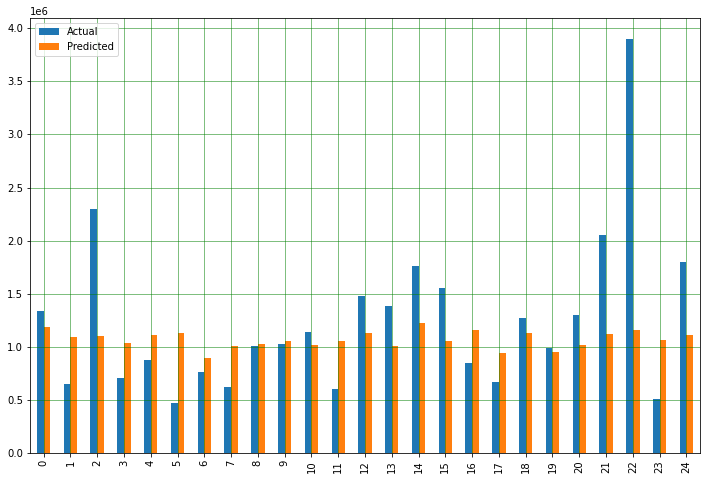

In [34]:
df2.head(25).plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluation Metrics

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print("Max Error:",round(metrics.max_error(y2_test, y2_pred), 2))

Mean Absolute Error: 458288.65405522526
Mean Squared Error: 375910769084.19617
Root Mean Squared Error: 613115.6245637492
Max Error: 3877709.53


In [36]:
print('MedAE :', 
     round(metrics.median_absolute_error(y2_test, y2_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y2_test, y2_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y2_test, y2_pred)))
print('R2 Score :',
     round(metrics.r2_score(y2_test, y2_pred), 2))

MedAE : 373935.94
MSLE : 0.29
RMSLE : 0.0
R2 Score : 0.01


### Test 2 (Train 90%)

### a) No Intervention

In [37]:
x3 = df_melb['Distance'].values.reshape(-1,1)
y3 = df_melb['Price'].values.reshape(-1,1)

#### Split dependent (y) & independent (x) variables

In [38]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size=0.9, random_state=0)

#### Split data to Train & Test

In [39]:
regressor = LinearRegression()
regressor.fit(x3_train, y3_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find Slope & Intercept

In [40]:
intercept = regressor.intercept_
slope = regressor.coef_
print(intercept, slope)

[1251299.54456026] [[-17498.89378766]]


#### Y Predict

In [41]:
y3_pred = regressor.predict(x3_test)
df3 = pd.DataFrame({'Actual' : y3_test.flatten(), 'Predicted' : y3_pred.flatten()})
df3

,Actual,Predicted
0,2165000.0,1.111308e+06
1,815000.0,1.135807e+06
2,610000.0,1.067561e+06
3,1245000.0,1.172555e+06
4,1160000.0,1.102559e+06
...,...,...
1353,535000.0,6.965846e+05
1354,880000.0,1.114808e+06
1355,844000.0,1.155056e+06
1356,405000.0,1.093810e+06


#### Visualization of Y Actual with Y Predict

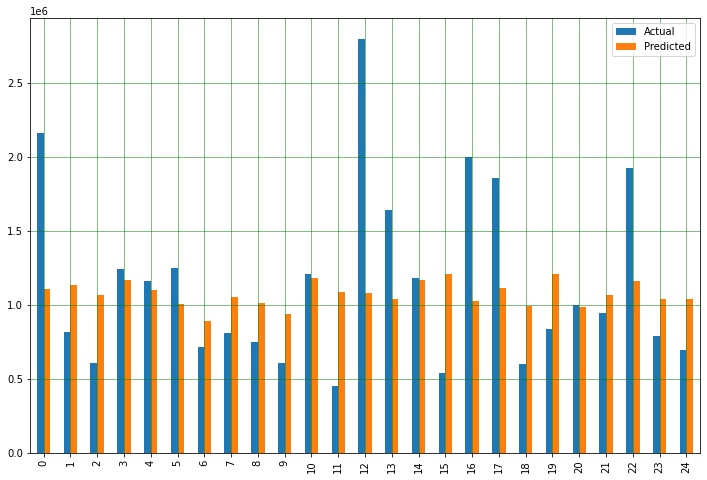

In [42]:
df3.head(25).plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluation Metrics

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))
print("Max Error:",round(metrics.max_error(y3_test, y3_pred), 2))

Mean Absolute Error: 449975.89815668145
Mean Squared Error: 380532538913.9886
Root Mean Squared Error: 616873.1951657395
Max Error: 4401197.14


In [44]:
print('MedAE :', 
     round(metrics.median_absolute_error(y3_test, y3_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y3_test, y3_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y3_test, y3_pred)))
print('R2 Score :',
     round(metrics.r2_score(y3_test, y3_pred), 2))

MedAE : 364305.3
MSLE : 0.27
RMSLE : 0.0
R2 Score : 0.03


### c) Handle Outlier

In [45]:
df3_melb = df_melb.copy()

In [46]:
Q1 = df3_melb['Distance'].quantile(0.25)
Q3 = df3_melb['Distance'].quantile(0.75)
IQR = Q3 - Q1

In [47]:
df3_melb_outdrop = df3_melb[~((df3_melb['Distance'] < (Q1 - 1.5 * IQR)) |(df3_melb['Distance'] > (Q3 + 1.5 * IQR)))]

In [48]:
df3_melb_outdrop.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [49]:
x4 = df3_melb_outdrop['Distance'].values.reshape(-1,1)
y4 = df3_melb_outdrop['Price'].values.reshape(-1,1)

#### Split dependent (y) & independent (x) variables

In [50]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, train_size=0.9, random_state=0)

#### Split data to Train & Test

In [51]:
regressor = LinearRegression()
regressor.fit(x4_train, y4_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find Slope & Intercept

In [52]:
intercept = regressor.intercept_
slope = regressor.coef_
print(intercept, slope)

[1253090.64317656] [[-17054.67553923]]


#### Y Predict

In [53]:
y4_pred = regressor.predict(x4_test)
df4 = pd.DataFrame({'Actual' : y4_test.flatten(), 'Predicted' : y4_pred.flatten()})
df4

,Actual,Predicted
0,1342000.0,1.188283e+06
1,650000.0,1.097893e+06
2,2300000.0,1.103009e+06
3,702000.0,1.038202e+06
4,880000.0,1.109831e+06
...,...,...
1312,950000.0,1.092777e+06
1313,695000.0,1.034791e+06
1314,1550000.0,1.125181e+06
1315,1586000.0,1.010914e+06


#### Visualization of Y Actual with Y Predict

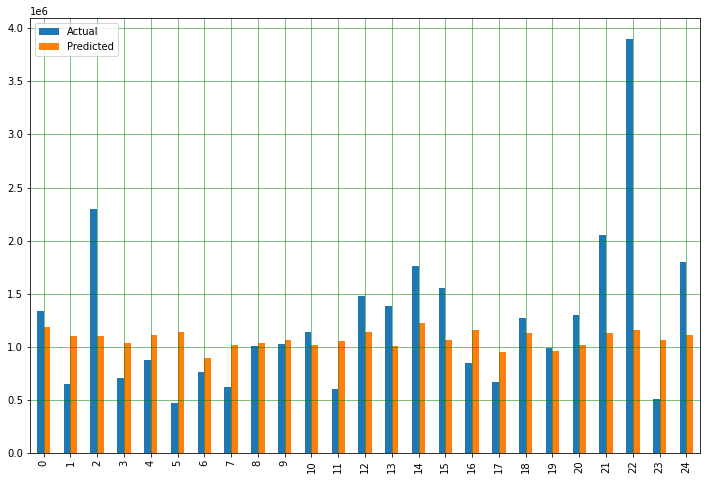

In [54]:
df4.head(25).plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluation Metrics

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y4_test, y4_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y4_test, y4_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))
print("Max Error:",round(metrics.max_error(y4_test, y4_pred), 2))

Mean Absolute Error: 445049.41109011875
Mean Squared Error: 352731629323.5438
Root Mean Squared Error: 593912.1393973555
Max Error: 3875360.86


In [56]:
print('MedAE :', 
     round(metrics.median_absolute_error(y4_test, y4_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y4_test, y4_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y4_test, y4_pred)))
print('R2 Score :',
     round(metrics.r2_score(y4_test, y4_pred), 2))

MedAE : 367266.55
MSLE : 0.3
RMSLE : 0.0
R2 Score : 0.01


### d) Handle Outlier & Scaling

In [57]:
df4_melb = df3_melb_outdrop.copy()

In [58]:
df4_melb['Distance Scl'] = MinMaxScaler().fit_transform(df4_melb[['Distance']])

In [59]:
df4_melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Distance Scl
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,0.107296
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,0.107296
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,0.107296
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,0.107296
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,0.107296


In [60]:
x5 = df4_melb['Distance Scl'].values.reshape(-1,1)
y5 = df4_melb['Price'].values.reshape(-1,1)

#### Split dependent (y) & independent (x) variables

In [61]:
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, train_size=0.9, random_state=0)

#### Split data to Train & Test

In [62]:
regressor = LinearRegression()
regressor.fit(x5_train, y5_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Find Slope & Intercept

In [63]:
intercept = regressor.intercept_
slope = regressor.coef_
print(intercept, slope)

[1253090.64317656] [[-397373.94006396]]


#### Y Predict

In [64]:
y5_pred = regressor.predict(x5_test)
df5 = pd.DataFrame({'Actual' : y5_test.flatten(), 'Predicted' : y5_pred.flatten()})
df5

,Actual,Predicted
0,1342000.0,1.188283e+06
1,650000.0,1.097893e+06
2,2300000.0,1.103009e+06
3,702000.0,1.038202e+06
4,880000.0,1.109831e+06
...,...,...
1312,950000.0,1.092777e+06
1313,695000.0,1.034791e+06
1314,1550000.0,1.125181e+06
1315,1586000.0,1.010914e+06


#### Visualization of Y Actual with Y Predict

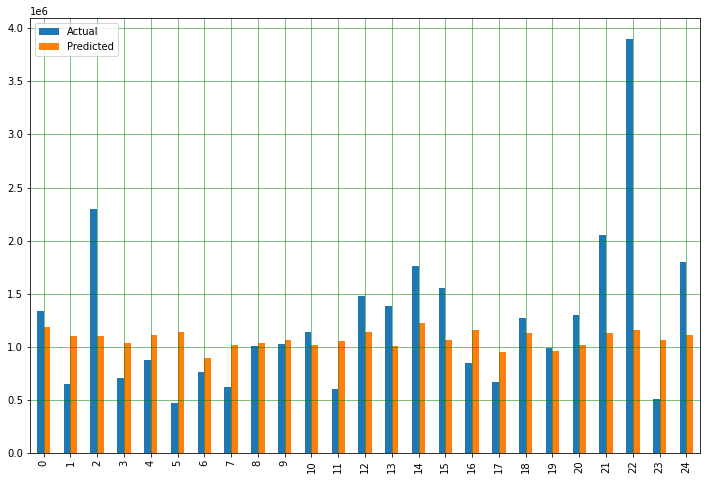

In [65]:
df5.head(25).plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluation Metrics

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y5_test, y5_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y5_test, y5_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y5_test, y5_pred)))
print("Max Error:",round(metrics.max_error(y5_test, y5_pred), 2))

Mean Absolute Error: 445049.41109011864
Mean Squared Error: 352731629323.5438
Root Mean Squared Error: 593912.1393973555
Max Error: 3875360.86


In [67]:
print('MedAE :', 
     round(metrics.median_absolute_error(y5_test, y5_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y5_test, y5_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y5_test, y5_pred)))
print('R2 Score :',
     round(metrics.r2_score(y5_test, y5_pred), 2))

MedAE : 367266.55
MSLE : 0.3
RMSLE : 0.0
R2 Score : 0.01


Although it was a very repetitive steps, but we finished all of the above tests. But in order to find the best method, I'll try to display it so we can compare the result between methods.

### Comparing The MAE, MSE & RMSE

#### No Intervention

In [68]:
#train 80% no intervention
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Max Error:",round(metrics.max_error(y_test, y_pred), 2))

Mean Absolute Error: 453479.31553528755
Mean Squared Error: 383466291875.1081
Root Mean Squared Error: 619246.5517668291
Max Error: 5199412.0


In [69]:
#train 90% no intervention
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))
print("Max Error:",round(metrics.max_error(y3_test, y3_pred), 2))

Mean Absolute Error: 449975.89815668145
Mean Squared Error: 380532538913.9886
Root Mean Squared Error: 616873.1951657395
Max Error: 4401197.14


Comparing above errors, I concurr that using the 90% trained data are better than 80% trained data. We can see that although we got a more or less similar result, but the 90% trained data got less Max Error than the 80% one.

#### Handle Outlier

In [70]:
#train 80% handle outlier
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("Max Error:",round(metrics.max_error(y1_test, y1_pred), 2))

Mean Absolute Error: 458288.65405522526
Mean Squared Error: 375910769084.1962
Root Mean Squared Error: 613115.6245637492
Max Error: 3877709.53


In [71]:
#train 90% handle outlier
print('Mean Absolute Error:', metrics.mean_absolute_error(y4_test, y4_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y4_test, y4_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))
print("Max Error:",round(metrics.max_error(y4_test, y4_pred), 2))

Mean Absolute Error: 445049.41109011875
Mean Squared Error: 352731629323.5438
Root Mean Squared Error: 593912.1393973555
Max Error: 3875360.86


The result in this category are still the same, using the 90% trained data are better than 80% trained data. We can see that the 90% trained data got slightly less Max Error than the 80% one.

#### Handle Outlier + Scaling

In [72]:
#train 80% handle outlier + scaling
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print("Max Error:",round(metrics.max_error(y2_test, y2_pred), 2))

Mean Absolute Error: 458288.65405522526
Mean Squared Error: 375910769084.19617
Root Mean Squared Error: 613115.6245637492
Max Error: 3877709.53


In [73]:
#train 90% handle outlier + scaling
print('Mean Absolute Error:', metrics.mean_absolute_error(y5_test, y5_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y5_test, y5_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y5_test, y5_pred)))
print("Max Error:",round(metrics.max_error(y5_test, y5_pred), 2))

Mean Absolute Error: 445049.41109011864
Mean Squared Error: 352731629323.5438
Root Mean Squared Error: 593912.1393973555
Max Error: 3875360.86


This category are also the same. We can see that the 90% trained data also got slightly less Max Error than the 80% one.

### Comparing The MedAE, MSLE, RMSLE & R2 Score

#### No Intervention

In [74]:
#train 80% no intervention
print('MedAE :',  
     round(metrics.median_absolute_error(y_test, y_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y_test, y_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y_test, y_pred)))
print('R2 Score :',
     round(metrics.r2_score(y_test, y_pred), 2))

MedAE : 366714.5
MSLE : 0.29
RMSLE : 0.0
R2 Score : 0.03


In [75]:
#train 90% no intervention
print('MedAE :', 
     round(metrics.median_absolute_error(y3_test, y3_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y3_test, y3_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y3_test, y3_pred)))
print('R2 Score :',
     round(metrics.r2_score(y3_test, y3_pred), 2))

MedAE : 364305.3
MSLE : 0.27
RMSLE : 0.0
R2 Score : 0.03


Comparing both result in this category, we can see that although we got similar R2 score in both 80% and 90% trained data, but we can see that the 90% trained data still got less error than the 80% one.

#### Handle Outlier

In [76]:
#train 80% handle outlier
print('MedAE :', 
     round(metrics.median_absolute_error(y1_test, y1_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y1_test, y1_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y1_test, y1_pred)))
print('R2 Score :',
     round(metrics.r2_score(y1_test, y1_pred), 2))

MedAE : 373935.94
MSLE : 0.29
RMSLE : 0.0
R2 Score : 0.01


In [77]:
#train 90% handle outlier
print('MedAE :', 
     round(metrics.median_absolute_error(y4_test, y4_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y4_test, y4_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y4_test, y4_pred)))
print('R2 Score :',
     round(metrics.r2_score(y4_test, y4_pred), 2))

MedAE : 367266.55
MSLE : 0.3
RMSLE : 0.0
R2 Score : 0.01


The 90% trained data are still better in both of the handle outlier (Above) and handle outlier + scaling (Below). As they still got less error than the 80% one.

#### Handle Outlier + Scaling

In [78]:
#train 80% handle outlier + scaling
print('MedAE :', 
     round(metrics.median_absolute_error(y2_test, y2_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y2_test, y2_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y2_test, y2_pred)))
print('R2 Score :',
     round(metrics.r2_score(y2_test, y2_pred), 2))

MedAE : 373935.94
MSLE : 0.29
RMSLE : 0.0
R2 Score : 0.01


In [79]:
#train 90% handle outlier + scaling
print('MedAE :', 
     round(metrics.median_absolute_error(y5_test, y5_pred), 2))
print('MSLE :', 
     round(metrics.mean_squared_log_error(y5_test, y5_pred), 2))
print('RMSLE :',
     round(metrics.mean_squared_log_error(y5_test, y5_pred)))
print('R2 Score :',
     round(metrics.r2_score(y5_test, y5_pred), 2))

MedAE : 367266.55
MSLE : 0.3
RMSLE : 0.0
R2 Score : 0.01


In conclusion using 90% test data are better as it might get less Error, but the best result might be if we handle the outliers first.